# EDA: California wildfires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy import inspect

%matplotlib inline

## Data import & cleaning 

### Importing SQL database

In [2]:
# importing SQL database (from webscraping notebook)

engine = create_engine('sqlite:///wildfires.db')
fire_df = pd.read_sql('SELECT * FROM raw_data', con=engine)

In [3]:
fire_df.head()

,name,start_date,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
0,Sanderson Fire,12/12/2020,Riverside,1933.0,12/14/20 5:50 PM,12/13/20 1:00 AM,12/14/20 5:50PM,"[33.93244, -117.03459]",Under Investigation,0,0
1,Cornell Fire,12/7/2020,Ventura,174.0,12/17/20 11:18 AM,12/07/20 11:44 AM,12/08/20 11:17AM,"[34.33622, -119.078]",None,0,0
2,Thomas Fire,12/3/2020,Lassen,24.0,12/03/20 6:36 PM,12/03/20 1:32 PM,12/03/20 5:40PM,"[41.591948, -120.374514]",None,0,0
3,Cerritos Fire,12/2/2020,Riverside,200.0,12/04/20 6:45 PM,12/03/20 2:06 AM,None,"[33.773754, -117.051463]",Under Investigation,0,0
4,Bond Fire,12/2/2020,Orange,6686.0,12/17/20 1:15 PM,12/02/20 10:14 PM,12/10/20 6:59PM,"[33.743842, -117.674967]",None,31,0


In [4]:
fire_df.shape

(1883, 11)

### Data cleaning

In [5]:
# df is in reverse chronological order -> reverse

fire_df = fire_df[::-1]
fire_df.head()

,name,start_date,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
1882,Becks Fire,1/22/2013,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,None,Unknown,0,0
1881,River Fire,2/24/2013,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,"[36.602575, -118.01651]",Under Investigation,0,0
1880,Jurupa Fire,2/28/2013,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,None,Unknown,0,0
1879,Butte Fire,4/9/2013,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,None,Unknown,0,0
1878,Fawnskin Fire,4/20/2013,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,"[34.288877, -116.941311]",Unknown,0,0


In [6]:
# fixing index

fire_df = fire_df.reset_index(drop=True)
fire_df.head()

,name,start_date,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
0,Becks Fire,1/22/2013,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,None,Unknown,0,0
1,River Fire,2/24/2013,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,"[36.602575, -118.01651]",Under Investigation,0,0
2,Jurupa Fire,2/28/2013,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,None,Unknown,0,0
3,Butte Fire,4/9/2013,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,None,Unknown,0,0
4,Fawnskin Fire,4/20/2013,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,"[34.288877, -116.941311]",Unknown,0,0


In [7]:
# 1893 wildfires over the course of 8 years

fire_df.shape

(1883, 11)

In [8]:
# convert start_date to DateTime format

fire_df['start_date'] = pd.to_datetime(fire_df['start_date'])
fire_df.head()

,name,start_date,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
0,Becks Fire,2013-01-22,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,None,Unknown,0,0
1,River Fire,2013-02-24,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,"[36.602575, -118.01651]",Under Investigation,0,0
2,Jurupa Fire,2013-02-28,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,None,Unknown,0,0
3,Butte Fire,2013-04-09,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,None,Unknown,0,0
4,Fawnskin Fire,2013-04-20,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,"[34.288877, -116.941311]",Unknown,0,0


In [9]:
# create a new column for year

fire_df.insert(2, 'year', fire_df.start_date.dt.year)

In [10]:
fire_df.head()

,name,start_date,year,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
0,Becks Fire,2013-01-22,2013,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,None,Unknown,0,0
1,River Fire,2013-02-24,2013,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,"[36.602575, -118.01651]",Under Investigation,0,0
2,Jurupa Fire,2013-02-28,2013,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,None,Unknown,0,0
3,Butte Fire,2013-04-09,2013,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,None,Unknown,0,0
4,Fawnskin Fire,2013-04-20,2013,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,"[34.288877, -116.941311]",Unknown,0,0


In [11]:
# finding duplicates - looks like there are 2
# Bradley and Sandy are true duplicates - 2 entries on website

fire_df.groupby(['name', 'start_date']).count().sort_values(by='year', ascending=False).head(2)

,,year,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
name,start_date,,,,,,,,,,
Sandy Fire,2017-08-02,2,2,2,2,2,2,2,2,2,2
Bradley Fire,2017-08-28,2,2,2,2,2,2,2,2,2,2


In [12]:
# drop duplicates

fire_df.drop_duplicates(inplace=True)
fire_df.shape

(1881, 12)

In [13]:
# 2 fires with '1969' start dates

fire_df[fire_df['year'] == 1969]

,name,start_date,year,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
615,Taglio Fire,1969-12-31,1969,Merced,12.0,01/09/18 10:05 AM,12/31/69 4:00 PM,01/09/18 10:05AM,"[37.21812, -121.07761]",Unknown,0,0
1051,Bridge Fire,1969-12-31,1969,Marin,45.0,01/04/19 9:22 AM,12/31/69 4:00 PM,01/04/19 9:22AM,"[38.07135, -122.76751]",Unknown,0,0


In [14]:
# dropping fires with year outside 2013-2021

fire_df = fire_df[(fire_df.year >= 2013) & (fire_df.year <= 2021)]
fire_df.shape

(1879, 12)

In [15]:
fire_df = fire_df.reset_index(drop=True)
fire_df.tail()

,name,start_date,year,counties,acres,last_updated,date_started,date_contained,lat_long,cause,destroyed,fatalities
1874,Bond Fire,2020-12-02,2020,Orange,6686.0,12/17/20 1:15 PM,12/02/20 10:14 PM,12/10/20 6:59PM,"[33.743842, -117.674967]",None,31,0
1875,Cerritos Fire,2020-12-02,2020,Riverside,200.0,12/04/20 6:45 PM,12/03/20 2:06 AM,None,"[33.773754, -117.051463]",Under Investigation,0,0
1876,Thomas Fire,2020-12-03,2020,Lassen,24.0,12/03/20 6:36 PM,12/03/20 1:32 PM,12/03/20 5:40PM,"[41.591948, -120.374514]",None,0,0
1877,Cornell Fire,2020-12-07,2020,Ventura,174.0,12/17/20 11:18 AM,12/07/20 11:44 AM,12/08/20 11:17AM,"[34.33622, -119.078]",None,0,0
1878,Sanderson Fire,2020-12-12,2020,Riverside,1933.0,12/14/20 5:50 PM,12/13/20 1:00 AM,12/14/20 5:50PM,"[33.93244, -117.03459]",Under Investigation,0,0


In [16]:
# fixing 'destroyed' column - wasn't formatted properly during webscraping

fire_df['destroyed'] = fire_df['destroyed'].astype('str').apply(lambda x: x.replace(',', '')).astype('int')

In [17]:
# 'destroyed' is now fixed

fire_df['destroyed'].sort_values(ascending=False).head(10)

1343    18804
983      5636
418      1955
1348     1643
1233     1614
1848     1555
1802     1490
985      1355
1035     1063
413       877
Name: destroyed, dtype: int64

In [18]:
# changing lat_long column format to that required by streamlit

fire_df['lat_long'] = fire_df['lat_long'].str.replace('[', '') \
                .str.replace(']', '') \
                .str.split(',')
fire_df['lat'] = fire_df['lat_long'].apply(lambda x: float(x[0]) if x != None else np.nan)
fire_df['lon'] = fire_df['lat_long'].apply(lambda x: float(x[1]) if x != None else np.nan)
fire_df = fire_df.drop(['lat_long'], axis=1)

<ipython-input-18-47d1c79a74da>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  fire_df['lat_long'] = fire_df['lat_long'].str.replace('[', '') \


In [19]:
fire_df.head()

,name,start_date,year,counties,acres,last_updated,date_started,date_contained,cause,destroyed,fatalities,lat,lon
0,Becks Fire,2013-01-22,2013,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,Unknown,0,0,NaN,NaN
1,River Fire,2013-02-24,2013,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,Under Investigation,0,0,36.602575,-118.016510
2,Jurupa Fire,2013-02-28,2013,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,Unknown,0,0,NaN,NaN
3,Butte Fire,2013-04-09,2013,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,Unknown,0,0,NaN,NaN
4,Fawnskin Fire,2013-04-20,2013,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,Unknown,0,0,34.288877,-116.941311


### Storing cleaned data in a SQL db 

In [20]:
# converting df to a SQL table

fire_df.to_sql('cleaned_data', con=engine, 
               if_exists='replace', index=False)

In [21]:
pd.read_sql('SELECT * FROM cleaned_data', con=engine)

,name,start_date,year,counties,acres,last_updated,date_started,date_contained,cause,destroyed,fatalities,lat,lon
0,Becks Fire,2013-01-22 00:00:00.000000,2013,Lake,296.0,01/23/13 10:15 AM,01/22/13 11:08 AM,01/23/13 10:15AM,Unknown,0,0,NaN,NaN
1,River Fire,2013-02-24 00:00:00.000000,2013,Inyo,406.0,02/28/13 8:00 PM,02/24/13 8:16 AM,02/28/13 8:00PM,Under Investigation,0,0,36.602575,-118.016510
2,Jurupa Fire,2013-02-28 00:00:00.000000,2013,Riverside,311.0,03/02/13 7:00 PM,02/28/13 4:43 PM,03/02/13 7:00PM,Unknown,0,0,NaN,NaN
3,Butte Fire,2013-04-09 00:00:00.000000,2013,Fresno,80.0,04/09/13 3:30 PM,04/09/13 12:35 PM,04/09/13 3:30PM,Unknown,0,0,NaN,NaN
4,Fawnskin Fire,2013-04-20 00:00:00.000000,2013,San Bernardino,30.0,04/22/13 9:00 AM,04/20/13 5:30 PM,04/22/13 9:00AM,Unknown,0,0,34.288877,-116.941311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,Bond Fire,2020-12-02 00:00:00.000000,2020,Orange,6686.0,12/17/20 1:15 PM,12/02/20 10:14 PM,12/10/20 6:59PM,None,31,0,33.743842,-117.674967
1875,Cerritos Fire,2020-12-02 00:00:00.000000,2020,Riverside,200.0,12/04/20 6:45 PM,12/03/20 2:06 AM,None,Under Investigation,0,0,33.773754,-117.051463
1876,Thomas Fire,2020-12-03 00:00:00.000000,2020,Lassen,24.0,12/03/20 6:36 PM,12/03/20 1:32 PM,12/03/20 5:40PM,None,0,0,41.591948,-120.374514
1877,Cornell Fire,2020-12-07 00:00:00.000000,2020,Ventura,174.0,12/17/20 11:18 AM,12/07/20 11:44 AM,12/08/20 11:17AM,None,0,0,34.336220,-119.078000


## Creating figures for web app 

### Map

In [23]:
# creating a map

year_df = fire_df[fire_df['year'] == 2013]
lat_lon = year_df[['lat', 'lon']].dropna() # need to drop nulls first
lat_lon

,lat,lon
1,36.602575,-118.016510
4,34.288877,-116.941311
5,37.116295,-119.635004
6,38.441792,-122.350844
7,38.638828,-122.655616
...,...,...
151,38.816700,-122.849800
152,39.044200,-123.147800
153,39.044800,-122.765600
154,38.928900,-122.581800


### Fires/acres/structures/fatalities per year plots

In [24]:
# aggregating data in preparation for plotting

fires_per_year = fire_df.groupby('year').size().reset_index() \
    .rename(columns={0: 'total'})
fires_per_year

,year,total
0,2013,159
1,2014,115
2,2015,157
3,2016,184
4,2017,433
5,2018,309
6,2019,264
7,2020,258


In [26]:
# acres_per-year

acres_per_year = fire_df.groupby('year')['acres'].sum().reset_index() \
    .rename(columns={'acres': 'total'})
acres_per_year

,year,total
0,2013,523966.0
1,2014,440175.0
2,2015,699428.0
3,2016,500281.0
4,2017,1566246.0
5,2018,1617988.0
6,2019,285469.0
7,2020,2521282.0


In [28]:
# convert acres to thousands

acres_per_year['total'] = acres_per_year['total'].apply(lambda x: int(x / 1000))
acres_per_year

,year,total
0,2013,523
1,2014,440
2,2015,699
3,2016,500
4,2017,1566
5,2018,1617
6,2019,285
7,2020,2521


In [32]:
destroyed_per_year = fire_df.groupby('year')['destroyed'].sum().reset_index() \
    .rename(columns={'destroyed': 'total'})
destroyed_per_year

,year,total
0,2013,420
1,2014,555
2,2015,3148
3,2016,772
4,2017,9786
5,2018,22707
6,2019,525
7,2020,4659


In [33]:
fatalities_per_year = fire_df.groupby('year')['fatalities'].sum().reset_index() \
    .rename(columns={'fatalities': 'total'})
fatalities_per_year

,year,total
0,2013,0
1,2014,0
2,2015,6
3,2016,0
4,2017,44
5,2018,91
6,2019,2
7,2020,4


In [25]:
# converting dfs to SQL tables

fires_per_year.to_sql('fires_per_year', con=engine, 
               if_exists='replace', index=False)

In [29]:
acres_per_year.to_sql('acres_per_year', con=engine, 
               if_exists='replace', index=False)

In [116]:
destroyed_per_year.to_sql('destroyed_per_year', con=engine, 
               if_exists='replace', index=False)

In [117]:
fatalities_per_year.to_sql('fatalities_per_year', con=engine, 
               if_exists='replace', index=False)

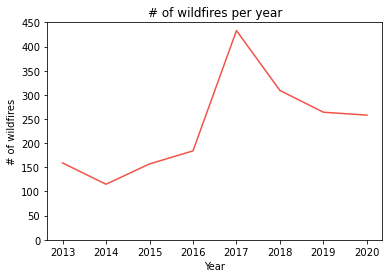

In [106]:
# plot of number of wildfires per year 

fig, ax = plt.subplots()
# from inside subplots(figsize=[8,5])
x = fires_per_year['year']
y = fires_per_year['total']
ticks_y = (range(0, 500, 50))
ax.plot(x, y, color='#F25348')
ax.set_title('# of wildfires per year')
ax.set_xlabel('Year')
ax.set_ylabel('# of wildfires')
ax.set_yticks(ticks_y);

Text(0, 0.5, 'Thousands of acres burned')

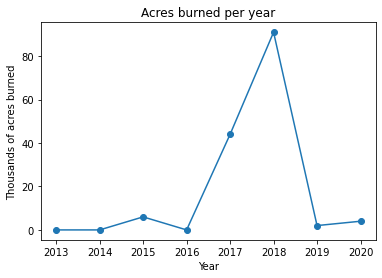

In [121]:
# plot of number of acres per year 

fig, ax = plt.subplots()
# from inside subplots(figsize=[8,5])
x = fatalities_per_year['year'].astype('int')
y = fatalities_per_year['total']
#ticks_y = (range(0, 3000, 500))
ax.plot(x, y, '-o')
ax.set_title('Acres burned per year')
ax.set_xlabel('Year')
ax.set_ylabel('Thousands of acres burned')
#ax.set_yticks(ticks_y);

### Top destructive & top fatal wildfires

In [115]:
# Most destructive wildfires

top_destructive = fire_df.loc[:, ['name', 'start_date', 'counties', 'acres', 'destroyed', 'fatalities', 'cause']] \
                .sort_values(by='destroyed', ascending=False).set_index('name').head(10)
top_destructive

,start_date,counties,acres,destroyed,fatalities,cause
name,,,,,,
Camp Fire,2018-11-07,Butte,153336.0,18804,85,Under Investigation
Tubbs Fire (Central LNU Complex),2017-10-08,Napa and Sonoma,36807.0,5636,22,Unknown
Valley Fire,2015-09-12,None,76067.0,1955,4,Electrical
Woolsey Fire,2018-11-08,Los Angeles and Ventura,96949.0,1643,3,Under Investigation
Carr Fire,2018-07-23,Shasta and Trinity,229651.0,1614,3,Vehicle
Glass Fire,2020-09-26,Napa and Sonoma,67484.0,1555,0,Under Investigation
CZU Lightning Complex (Including Warnella Fire),2020-08-15,Santa Cruz and San Mateo,86509.0,1490,0,Lightning
Nuns / Adobe / Norrbom/ Pressley / Partrick Fires / Oakmont (Central LNU Complex),2017-10-08,Napa and Sonoma,56556.0,1355,3,Unknown
Thomas Fire,2017-12-04,Santa Barbara and Ventura,281893.0,1063,0,Power Lines


### Fire season plots 

In [58]:
# preparing data and storing in a SQL table

min_year = fire_df['year'].min()
max_year = fire_df['year'].max()
for year in range(min_year, max_year+1):  
    single_year = fire_df[fire_df['year'] == year]
    
    # grouping by start date and adding rows for missing dates
    first_date = str(year) + "-01-01"
    last_date = str(year) + "-12-31"
    date_range = pd.date_range(first_date, last_date, freq='D')
    fires_per_date = single_year.groupby('start_date').size().reindex(date_range, fill_value=0)
    fires_per_date = fires_per_date.reset_index().rename(columns={'index': 'date', 0: 'total'})
    
    # compute 14 day rolling average (first 13 days will be null)
    fires_per_date['avg_14d'] = fires_per_date['total'].rolling(14).mean()
    
    # converting df to a SQL table
    fires_per_date.to_sql('fires_per_date', con=engine, 
               if_exists='append', index=False)

In [63]:
# importing from SQL db back into a df

fires_per_date = pd.read_sql('SELECT * FROM fires_per_date', con=engine)
fires_per_date.head()

,date,total,avg_14d
0,2013-01-01 00:00:00.000000,0,NaN
1,2013-01-02 00:00:00.000000,0,NaN
2,2013-01-03 00:00:00.000000,0,NaN
3,2013-01-04 00:00:00.000000,0,NaN
4,2013-01-05 00:00:00.000000,0,NaN


In [67]:
# convert date to datetime format and isolate month-day

fires_per_date['date'] = pd.to_datetime(fires_per_date['date'])
fires_per_date['month-day'] = fires_per_date['date'].dt.strftime('%m-%d')

In [74]:
# get list of years in df

year_list = fires_per_date['date'].dt.year.unique()
year_list

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

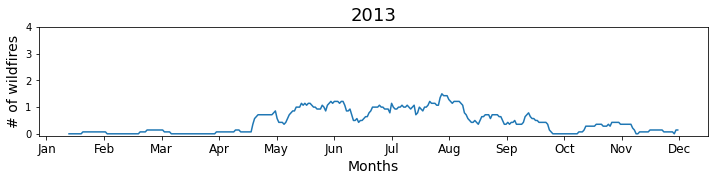

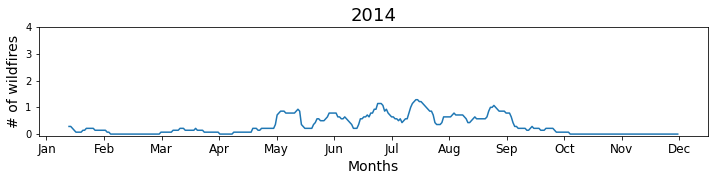

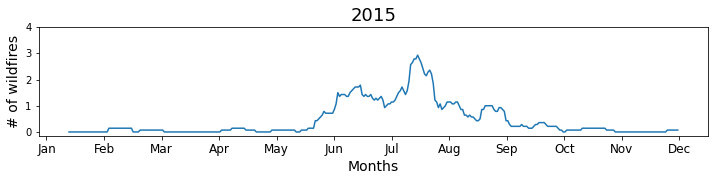

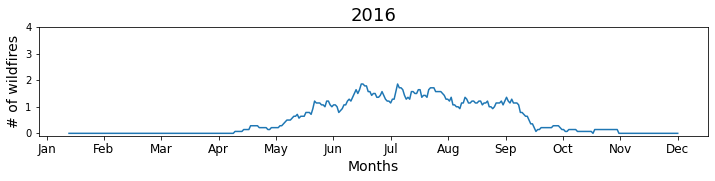

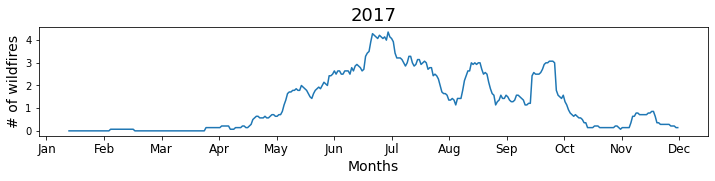

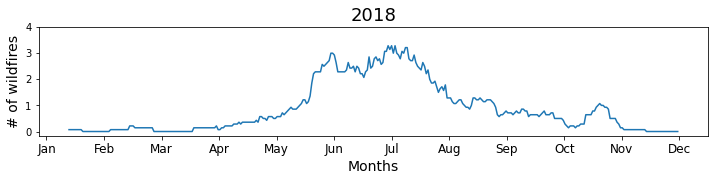

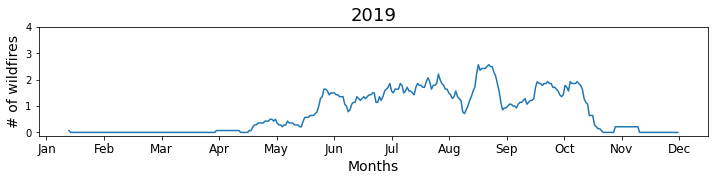

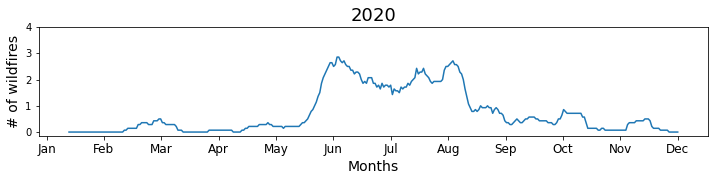

In [126]:
# plot number of wildfires over course of the year (14-day rolling average)
# title: Number of wildfires over course of the year (14-d rolling ave)

for year in year_list:
    single_year = fires_per_date[fires_per_date['date'].dt.year == year]
    
    fig, ax = plt.subplots(figsize=[12, 2])
    x = single_year['month-day']
    y = single_year['avg_14d']
    ax.plot(x, y)
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ticks_x = np.linspace(0, 365, 12)
    ticks_y = np.linspace(0, 4, 5)

    ax.set_title(year, fontsize='18')
    ax.set_xlabel('Months', fontsize='14')
    ax.set_ylabel('# of wildfires', fontsize='14')
    ax.set_xticks(ticks=ticks_x)
    ax.set_xticklabels(months, fontsize='12')
    ax.set_yticks(ticks_y);


### Unused cleaning

In [ ]:
# add a month-year column

fire_df['year-month'] = fire_df.start_date.dt.strftime('%Y-%m')
fire_df.head()

In [ ]:
# fires per year-month

fires_over_time = fire_df.groupby('year-month').size().reset_index() \
    .rename(columns={0: 'count'})
fires_over_time

In [ ]:
# plot of number of wildfires over time (over year-month)

fig, ax = plt.subplots()

x = fires_over_time['year-month']
y = fires_over_time['count']
#ticks_y = (range(0, 500, 50))
ax.plot(x, y)
ax.set_title('Number of wildfires over time in California')
ax.set_xlabel('Time')
ax.set_ylabel('# of wildfires')
#ax.set_yticks(ticks_y);

In [ ]:
# add a month column

fire_df['month'] = fire_df.start_date.dt.month
fire_df.head()

In [ ]:
# add a month-day column

fire_df['month-day'] = fire_df.start_date.dt.strftime('%m-%d')
fire_df.head()

In [ ]:
# 'cause' column has a lot of causes (although most are 'Unknown') 
# also a lot of nulls

fire_df['cause'].value_counts()

In [ ]:
fire_df['cause'].isnull().sum()

In [ ]:
# convert "Underinvestigation" to "Unknown"

### Importing and cleaning county data

In [ ]:
# importing NCHS data from cdc.gov - list of all 58 CA counties and urban/rural classification

county_df = pd.read_csv('CA_urban_rural_2013.csv')
county_df.head()

In [ ]:
del county_df['Unnamed: 5']

In [ ]:
county_df['Name'] = county_df['County name'].str.slice(0, -7)
county_df.head()

In [ ]:
county_df[county_df['County name'].str.contains('Alpine')]

## Converting DF to SQL Database 

In [ ]:
# using SQLAlchemy to connect to sqlite

engine = create_engine("sqlite://")

In [ ]:
# converting df to a SQL database

fire_df.to_sql('fire_db', con=engine)

In [ ]:
# table name is as expected

insp = inspect(engine)
insp.get_table_names()

In [ ]:
# selecting all the data in the db

pd.read_sql('SELECT * FROM fire_db', con=engine)